I'm using a Fourier Transform to negate the time dimensionality of the data. This should hopefully result in less redundant data for the model.

In [1]:
import numpy as np
epochs = np.load("chb01-03_epochs_np_array.npy")


In [2]:
transformed = np.fft.fft(epochs)

(89976, 23, 256)


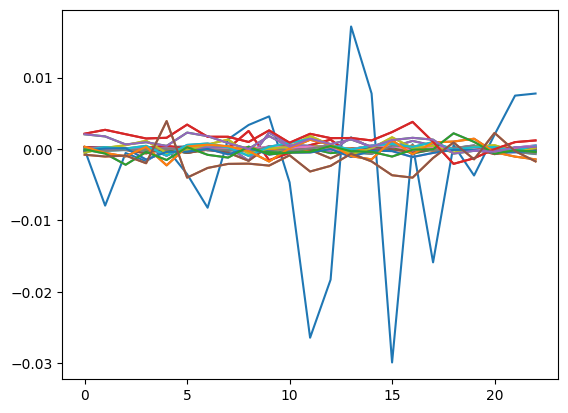

In [8]:
import matplotlib.pyplot as plt
print(transformed.shape)
plt.plot(transformed[0])
plt.show()

(89976, 23, 256)


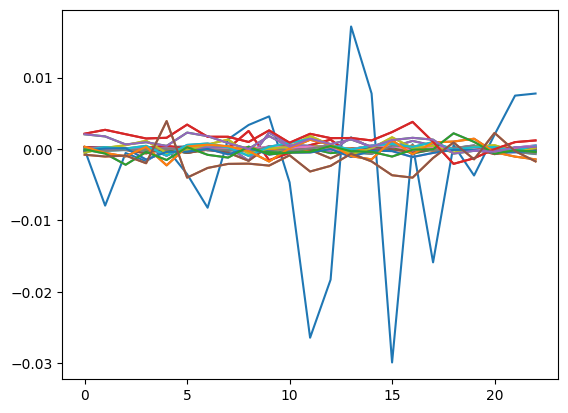

In [22]:
print(transformed.shape)
plt.plot(transformed[0])
plt.show()